# Data Immersion Task 4.10 part 1

### Table of Contents

1. Importing libraries and data
2. Addressing Personally Identifiable Information
3. Creating a regional flag within the dataset
        3b. Looking for insights within the regional segmentation
4. Excluding low-activity customers
5. Creating various customer "profiles" for targeted marketing purposes
6. Visualizing "profile" distribution
7. Looking for insights through the customer "profile" groups
8. Comparing customer profiles with regions and departments
        8b. Looking for differing customer "profile" behavior across regions
9. Examining customer "profile" behavior by department

#### 1. Importing libraries and data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [56]:
# Importing data

# identifying project path
project =r'D:\Adam\Employment\Data Analysis Course\Python Instacart project'

# Import Instacart prepared orders data
df = pd.read_pickle(os.path.join(project, '02 Data', 'Prepared Data', 'ic_merged.pkl'))

#### 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [3]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spender_type', 'avg_days_since_last_order',
       'order_frequency', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income'],
      dtype='object')

In [4]:
df[['user_id','order_id','new_customer','loyalty_flag','spender_type','gender','state','age','n_dependants','fam_status','income']].head(30)

,user_id,order_id,new_customer,loyalty_flag,spender_type,gender,state,age,n_dependants,fam_status,income
0,1,2539329,True,Newer customer,Low spender,Female,Alabama,31,3,married,40423
1,1,2398795,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
2,1,473747,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
3,1,2254736,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
4,1,431534,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
5,1,3367565,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
6,1,550135,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
7,1,3108588,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
8,1,2295261,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423
9,1,2550362,False,Newer customer,Low spender,Female,Alabama,31,3,married,40423


In [5]:
df[['user_id','order_id','new_customer','loyalty_flag','spender_type','gender','state','age','n_dependants','fam_status','income']].tail(30)

,user_id,order_id,new_customer,loyalty_flag,spender_type,gender,state,age,n_dependants,fam_status,income
32404829,106143,259165,True,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404830,106143,2738626,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404831,106143,218446,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404832,106143,2645700,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404833,106143,42576,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404834,106143,1053604,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404835,106143,2409631,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404836,106143,1943329,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404837,106143,477467,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755
32404838,106143,2835422,False,Regular customer,High spender,Male,Hawaii,25,0,single,53755


In [6]:
# It doesn't appear to me that this combination of information is enough to personally
# identify anyone, as it's not specific enough.

#### 3. Create a regional segmentation of the data.

In [59]:
# Using this info: https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States
# To assign regions based on state

df.loc[(df['state'] == 'Maine') | (df['state'] == 'New Hampshire') | (df['state'] == 'Vermont') | (df['state'] == 'Massachusetts') | (df['state'] == 'Rhode Island') | (df['state'] == 'Connecticut') | (df['state'] == 'New York') | (df['state'] == 'Pennsylvania') | (df['state'] == 'New Jersey'), 'region'] = 'Northeast'
df.loc[(df['state'] == 'Wisconsin') | (df['state'] == 'Michigan') | (df['state'] == 'Illinois') | (df['state'] == 'Indiana') | (df['state'] == 'Ohio') | (df['state'] == 'North Dakota') | (df['state'] == 'South Dakota') | (df['state'] == 'Nebraska') | (df['state'] == 'Kansas') | (df['state'] == 'Minnesota') | (df['state'] == 'Iowa') | (df['state'] == 'Missouri'), 'region'] = 'Midwest'
df.loc[(df['state'] == 'Delaware') | (df['state'] == 'Maryland') | (df['state'] == 'District of Columbia') | (df['state'] == 'Virginia') | (df['state'] == 'West Virginia') | (df['state'] == 'North Carolina') | (df['state'] == 'South Carolina') | (df['state'] == 'Georgia') | (df['state'] == 'Florida') | (df['state'] == 'Kentucky') | (df['state'] == 'Tennessee') | (df['state'] == 'Mississippi')  | (df['state'] == 'Alabama') | (df['state'] == 'Oklahoma') | (df['state'] == 'Texas') | (df['state'] == 'Arkansas') | (df['state'] == 'Louisiana'),'region'] = 'South'
df.loc[(df['state'] == 'Idaho') | (df['state'] == 'Montana') | (df['state'] == 'Wyoming') | (df['state'] == 'Nevada') | (df['state'] == 'Utah') | (df['state'] == 'Colorado') | (df['state'] == 'Arizona') | (df['state'] == 'New Mexico') | (df['state'] == 'Alaska') | (df['state'] == 'Hawaii') | (df['state'] == 'Washington') | (df['state'] == 'Oregon') | (df['state'] == 'California'), 'region'] = 'West'

In [60]:
df[['user_id','order_id','new_customer','loyalty_flag','spender_type','gender','state', 'region', 'age','n_dependants','fam_status','income']].tail(60)

,user_id,order_id,new_customer,loyalty_flag,spender_type,gender,state,region,age,n_dependants,fam_status,income
32404799,11534,2164282,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404800,11534,878799,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404801,11534,3315464,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404802,11534,2698828,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404803,11534,917560,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404804,11534,490079,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404805,11534,2371958,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404806,11534,2462548,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404807,11534,1367873,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023
32404808,11534,2376815,False,Regular customer,High spender,Female,Delaware,South,69,0,divorced/widowed,103023


In [9]:
# Checking output for errors

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
# found missing values, checking state list for missing values

df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [61]:
# found no missing values in state list, check which states produce missing values in the region

df[df['region'].isnull()]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,spender_type,avg_days_since_last_order,order_frequency,gender,state,age,n_dependants,fam_status,income,region


In [12]:
# Idenitified Massachusetts as the missing value, must've spelled it wrong. Re-running its portion of the region script

df.loc[df['state'] == 'Massachusetts', 'region'] = 'Northeast'

In [13]:
# Checking output for errors again

df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

#### 3b. # Determine whether there’s a difference in spending habits between the different U.S. regions.

In [62]:
# creating a crosstab to compare the two columns' values
crosstab = pd.crosstab(df['region'], df['spender_type'], dropna = False)

In [15]:
crosstab.to_clipboard()

In [16]:
crosstab.sort_values(by="High spender", ascending = False)

spender_type,High spender,Low spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [17]:
# According to these results, I could say that the South spends more, but to be honest, it simply has by far the most states
# in its region. And since I already saw that the location data (and all customer data) was fabricated such that they were
# evenly spread geographically, then this is meaningless.

In [63]:
# creating a new crosstab to compare the two columns' values by state and then aggregate as average by region
crosstab_new = pd.crosstab(df['state'], df['spender_type'], dropna = False)

In [64]:
# resetting index so I can access the "state" column header (instead of header being two rows)
# in order to add region data by state

crosstab_new = crosstab_new.reset_index(drop=False)

In [65]:
crosstab_new

spender_type,state,High spender,Low spender
0,Alabama,13453,624550
1,Alaska,9368,639127
2,Arizona,12393,641571
3,Arkansas,10377,625767
4,California,11437,648346
5,Colorado,12902,626378
6,Connecticut,12332,610690
7,Delaware,16600,620424
8,District of Columbia,12673,601022
9,Florida,9312,619715


In [66]:
# assign regions based on state

crosstab_new.loc[(crosstab_new['state'] == 'Maine') | (crosstab_new['state'] == 'New Hampshire') | (crosstab_new['state'] == 'Vermont') | (crosstab_new['state'] == 'Massachusetts') | (crosstab_new['state'] == 'Rhode Island') | (crosstab_new['state'] == 'Connecticut') | (crosstab_new['state'] == 'New York') | (crosstab_new['state'] == 'Pennsylvania') | (crosstab_new['state'] == 'New Jersey'), 'region'] = 'Northeast'
crosstab_new.loc[(crosstab_new['state'] == 'Wisconsin') | (crosstab_new['state'] == 'Michigan') | (crosstab_new['state'] == 'Illinois') | (crosstab_new['state'] == 'Indiana') | (crosstab_new['state'] == 'Ohio') | (crosstab_new['state'] == 'North Dakota') | (crosstab_new['state'] == 'South Dakota') | (crosstab_new['state'] == 'Nebraska') | (crosstab_new['state'] == 'Kansas') | (crosstab_new['state'] == 'Minnesota') | (crosstab_new['state'] == 'Iowa') | (crosstab_new['state'] == 'Missouri'), 'region'] = 'Midwest'
crosstab_new.loc[(crosstab_new['state'] == 'Delaware') | (crosstab_new['state'] == 'Maryland') | (crosstab_new['state'] == 'District of Columbia') | (crosstab_new['state'] == 'Virginia') | (crosstab_new['state'] == 'West Virginia') | (crosstab_new['state'] == 'North Carolina') | (crosstab_new['state'] == 'South Carolina') | (crosstab_new['state'] == 'Georgia') | (crosstab_new['state'] == 'Florida') | (crosstab_new['state'] == 'Kentucky') | (crosstab_new['state'] == 'Tennessee') | (crosstab_new['state'] == 'Mississippi')  | (crosstab_new['state'] == 'Alabama') | (crosstab_new['state'] == 'Oklahoma') | (crosstab_new['state'] == 'Texas') | (crosstab_new['state'] == 'Arkansas') | (crosstab_new['state'] == 'Louisiana'),'region'] = 'South'
crosstab_new.loc[(crosstab_new['state'] == 'Idaho') | (crosstab_new['state'] == 'Montana') | (crosstab_new['state'] == 'Wyoming') | (crosstab_new['state'] == 'Nevada') | (crosstab_new['state'] == 'Utah') | (crosstab_new['state'] == 'Colorado') | (crosstab_new['state'] == 'Arizona') | (crosstab_new['state'] == 'New Mexico') | (crosstab_new['state'] == 'Alaska') | (crosstab_new['state'] == 'Hawaii') | (crosstab_new['state'] == 'Washington') | (crosstab_new['state'] == 'Oregon') | (crosstab_new['state'] == 'California'), 'region'] = 'West'

In [67]:
crosstab_new

spender_type,state,High spender,Low spender,region
0,Alabama,13453,624550,South
1,Alaska,9368,639127,West
2,Arizona,12393,641571,West
3,Arkansas,10377,625767,South
4,California,11437,648346,West
5,Colorado,12902,626378,West
6,Connecticut,12332,610690,Northeast
7,Delaware,16600,620424,South
8,District of Columbia,12673,601022,South
9,Florida,9312,619715,South


In [23]:
crosstab_new.to_clipboard()

In [24]:
# creating pivot table to see average per-state high and low spenders by region

pivot = np.round(pd.pivot_table(crosstab_new, values=['High spender', 'Low spender'],
                               index=['region'],
                               aggfunc=np.mean),2)

In [25]:
pivot

spender_type,High spender,Low spender
region,,
Midwest,12997.92,620112.50
Northeast,12025.00,623834.56
South,12334.76,622482.00
West,12334.92,625581.46


In [26]:
# The above information (which I previously did in Excel, but wanted to replicate here), shows that the average per-state
# for high and low spenders is very similar with little enough differences to be meaningful
# By calculating it this way, we can see the difference between regions ignoring the fact that some regions have more states
# (i.e. more customers) and some regions have less states.
# And with that, we can see (above), that there's no real demographic differences (in these fake demographics)
# about which region actually has higher and lower spenders

In [27]:
# I was trying to find a way to do a pivot-table with above results directly from main df (instead of crosstab)
# and instead I managed to replicate the output of the first crosstab (as you'll see below in results)
# Looking at it, it makes sense.  I would need to first do a count by state like this and *then* do an average per state 
# by region. I would like to find a way to put all that together into one, but not sure how that would be.

pivot2 = np.round(pd.pivot_table(df, values='user_id',
                               index='region',
                                columns='spender_type',
                               aggfunc='count'),2)

In [28]:
pivot2

spender_type,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [29]:
pivot3 = np.round(pd.pivot_table(df, values='user_id',
                               index=['state', 'region'],
                                columns='spender_type',
                               aggfunc='count'),2)

In [30]:
pivot3

,spender_type,High spender,Low spender
state,region,,
Alabama,South,13453,624550
Alaska,West,9368,639127
Arizona,West,12393,641571
Arkansas,South,10377,625767
California,West,11437,648346
Colorado,West,12902,626378
Connecticut,Northeast,12332,610690
Delaware,South,16600,620424
District of Columbia,South,12673,601022


In [34]:
# trying to nest them just to see if it can be done.

pivot4 = np.round(pd.pivot_table(np.round(pd.pivot_table(df, values='user_id',
                                                         index=['state', 'region'],
                                                         columns='spender_type',
                                                         aggfunc='count'),2), 
                                 values=['High spender', 'Low spender'],
                                 index=['region'],
                                 aggfunc=np.mean),2)

In [35]:
pivot4

spender_type,High spender,Low spender
region,,
Midwest,12997.92,620112.50
Northeast,12025.00,623834.56
South,12334.76,622482.00
West,12334.92,625581.46


In [38]:
# Nice!  I figured out how to do it all in one, though realistically it's too convoluted to be practical
# I wonder if there's another way to do this in one function while avoiding nesting two different pivottables.

##### 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [39]:
# Creating flag for low-activity customers (less than 5 orders)

df.loc[df['max_order'] < 5, 'activity'] = 'low activity'

In [40]:
df['activity'].value_counts(dropna = False)

NaN             30964564
low activity     1440295
Name: activity, dtype: int64

In [41]:
df.shape

(32404859, 32)

In [42]:
# creating new dataframe excluding low activity customers

df2 = df[df['activity'] != 'low activity']

In [43]:
df2.shape

(30964564, 32)

In [49]:
# exporting dataframe (with no low customer activity)

df2.to_pickle(os.path.join(project, '02 Data','Prepared Data', 'ic_merged_no_lows.pkl'))

In [ ]:
df2.drop(columns=['activity'], inplace=True)

In [48]:
df2.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'new_customer',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'price_range_loc', 'busiest day',
       'busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_item_price', 'spender_type', 'avg_days_since_last_order',
       'order_frequency', 'gender', 'state', 'age', 'n_dependants',
       'fam_status', 'income', 'region'],
      dtype='object')

#### 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

In [2]:
# Reloading scripts (picking up where I left off), so reloading the most recently exported pkl

# Importing data

# identifying project path
project =r'D:\Adam\Employment\Data Analysis Course\Python Instacart project'

# Import Instacart prepared orders data
df2 = pd.read_pickle(os.path.join(project, '02 Data', 'Prepared Data', 'ic_merged_no_lows.pkl'))

In [8]:
df2[['fam_status','n_dependants']].value_counts(dropna = False)

fam_status                        n_dependants
married                           3               7284047
                                  2               7248603
                                  1               7211061
single                            0               5094410
divorced/widowed                  0               2645271
living with parents and siblings  1                508045
                                  3                488469
                                  2                484658
dtype: int64

Text(0.5, 1.0, 'Income Distribution Among Instacart Users')

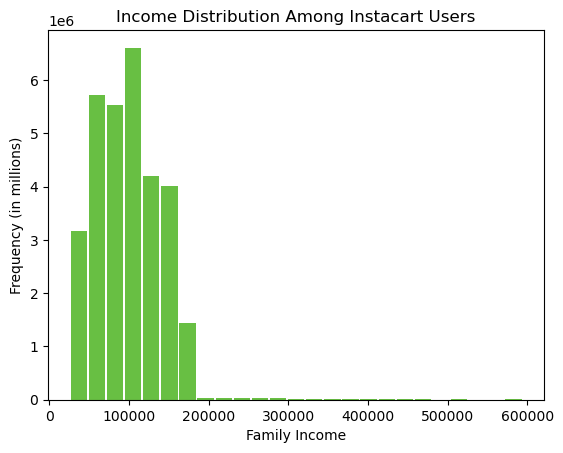

In [9]:
# creating histogram of incomes to determine relative values

hist = df2['income'].plot.hist(bins = 25, color = '#68bf43', rwidth=0.9)

plt.xlabel("Family Income")
plt.ylabel("Frequency (in millions)")
plt.title("Income Distribution Among Instacart Users")

In [10]:
# exporting histogram

hist.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'hist_customers_income.png'))

In [36]:
# creating profile for "single adult"

df2.loc[(df2['fam_status'] == 'single') & (df2['age'] > 17), 'profile'] = 'single adult'

In [37]:
# creating profile for "young parent"

df2.loc[(df2['n_dependants'] > 0) & (df2['age'] < 28), 'profile'] = 'young parent'

In [38]:
# creating profile for big families with high incomes (above $100,000)

df2.loc[(df2['n_dependants'] == 3) & (df2['income'] > 100000), 'profile'] = 'high-income big family'

In [39]:
# creating profile for "failed millenials" - living at home with parents and siblings but with 3 kids

df2.loc[(df2['n_dependants'] == 3) & (df2['fam_status'] == 'living with parents and siblings') & (df2['age'] < 43), 'profile'] = 'failed millenial'

In [40]:
# creating profile for "thriving millenials" - single with income over $80,000 (obviously none of
# which have kids, according to the data here, since no single people not living with parents and
# siblings have kids (then again, neither do divorced/widowed))

df2.loc[(df2['fam_status'] == 'single') & (df2['income'] > 80000) & (df2['age'] < 43), 'profile'] = 'thriving millenial'

In [41]:
# creating profile for "late night college munchers"

df2.loc[((df2['order_hour_of_day'] > 20) | (df2['order_hour_of_day'] < 5)) & (df2['age'] < 26), 'profile'] = 'late night college munchers'

In [42]:
df2['profile'].value_counts(dropna = False)

generally uninteresting        11396553
middle-class America            7099007
single adult                    3983606
high-income big family          3562929
young parent                    2960940
thriving millenial              1042508
failed millenial                 453173
late night college munchers      277360
sad & alone                      109005
wealthy retired                   79483
Name: profile, dtype: int64

In [43]:
# creating profile for "wealthy retired"

df2.loc[(df2['income'] > 200000) & (df2['age'] > 60), 'profile'] = 'wealthy retired'

In [44]:
# creating profile for "eligible bachelors"

df2.loc[(df2['fam_status'] == 'single') & (df2['income'] > 120000) & (df2['age'] < 45) & (df2['gender'] == "Male"), 'profile'] = 'eligible bachelors'

In [45]:
df2['profile'].value_counts(dropna = False)

generally uninteresting        11396553
middle-class America            7099007
single adult                    3933077
high-income big family          3537099
young parent                    2960940
thriving millenial               968754
failed millenial                 453173
late night college munchers      277053
eligible bachelors               124590
sad & alone                      109005
wealthy retired                  105313
Name: profile, dtype: int64

In [46]:
# interesting to see that some of the high-income big families are apparently also wealthy retired
# but since I don't have two profile columns, I'm not going to capture that overlap

In [47]:
# creating profile for "sad & alone"

df2.loc[(df2['fam_status'] == 'divorced/widowed') & (df2['income'] < 40000), 'profile'] = 'sad & alone'

In [48]:
# creating profile for "30, flirty, and thriving"

df2.loc[(df2['fam_status'] == 'single') & (df2['income'] > 65000) & (df2['age'] < 40) & (df2['age'] > 29) & (df2['gender'] == "Female"), 'profile'] = '30, flirty, and thriving'

In [49]:
# creating profile for "college party" (young people buying alcohol, snacks, or beverages on Friday or Saturday)

df2.loc[((df2['department_id'] == 5) | (df2['department_id'] == 7) | (df2['department_id'] == 19)) & ((df2['orders_day_of_week'] == 0) | (df2['orders_day_of_week'] == 6)) & (df2['age'] < 26), 'profile'] = 'college party'

In [50]:
# creating profile for "middle-class America"

df2.loc[(df2['n_dependants'] > 1) & (df2['fam_status'] == 'married') & (df2['income'] > 47000) & (df2['income'] < 142000), 'profile'] = 'middle-class America'

In [51]:
df2['profile'].value_counts(dropna = False)

generally uninteresting        11396553
middle-class America           10575311
single adult                    3754327
young parent                    1717911
high-income big family          1288680
thriving millenial               764527
failed millenial                 430891
30, flirty, and thriving         338539
late night college munchers      204784
college party                    154605
eligible bachelors               124118
sad & alone                      109005
wealthy retired                  105313
Name: profile, dtype: int64

In [52]:
# labelling everyone else as "generally uninteresting"

df2['profile'] = df2['profile'].fillna('generally uninteresting')

#### 6. Create an appropriate visualization to show the distribution of profiles.

([<matplotlib.axis.XTick at 0x151934e48b0>,
 [Text(0, 0, 'generally\nuninteresting'),
  Text(1, 0, 'middle-class\nAmerica'),
  Text(2, 0, 'single adult'),
  Text(3, 0, 'young parent'),
  Text(4, 0, 'high-income\nbig family'),
  Text(5, 0, 'thriving\nmillenial'),
  Text(6, 0, 'failed\nmillenial'),
  Text(7, 0, '30, flirty,\nand thriving'),
  Text(8, 0, 'late night\ncollege munchers'),
  Text(9, 0, 'college party'),
  Text(10, 0, 'eligible\nbachelors'),
  Text(11, 0, 'sad & alone'),
  Text(12, 0, 'wealthy\nretired')])

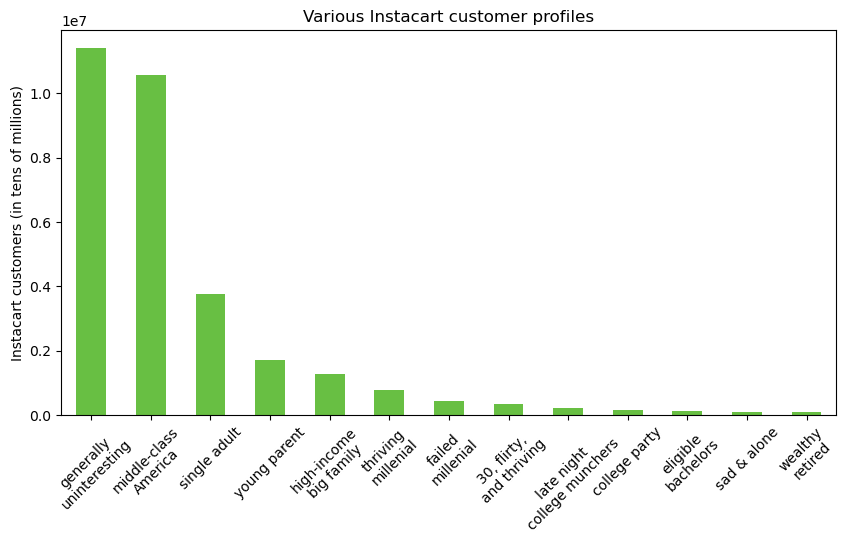

In [76]:
# creating a bar chart of instacart profiles

bar = df2['profile'].value_counts().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.ylabel("Instacart customers (in tens of millions)")
plt.title ("Various Instacart customer profiles")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['generally\nuninteresting','middle-class\nAmerica','single adult', 'young parent', 'high-income\nbig family','thriving\nmillenial','failed\nmillenial','30, flirty,\nand thriving','late night\ncollege munchers','college party','eligible\nbachelors','sad & alone','wealthy\nretired'])

In [78]:
# exporting bar graph

bar.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'ic_cust_profiles.png'), bbox_inches='tight')

#### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [79]:
# exporting dataframe (with no low customer activity and new "profile" column) 
# so I can pick up again tomorrow

df2.to_pickle(os.path.join(project, '02 Data','Prepared Data', 'ic_merged_no_lows.pkl'))

In [2]:
# Reloading scripts (picking up where I left off), so reloading the most recently exported pkl

# Importing data

# identifying project path
project =r'D:\Adam\Employment\Data Analysis Course\Python Instacart project'

# Import Instacart prepared orders data
df2 = pd.read_pickle(os.path.join(project, '02 Data', 'Prepared Data', 'ic_merged_no_lows.pkl'))

In [5]:
# aggregating min, max, mean of prices and avg_days_since_last_order for all profiles

df2.groupby('profile').agg({'prices': ['mean', 'min', 'max'], 'avg_days_since_last_order': ['mean', 'min', 'max']})

prices            avg_days_since_last_order  \
                                 mean  min   max                      mean   
profile                                                                      
30, flirty, and thriving     7.970154  1.0  25.0                 11.168295   
college party                5.931935  1.0  15.0                 11.598381   
eligible bachelors           7.919347  1.0  25.0                 11.019103   
failed millenial             7.918967  1.0  25.0                 10.838530   
generally uninteresting      7.709824  1.0  25.0                 11.021521   
high-income big family       7.963540  1.0  25.0                 11.016399   
late night college munchers  7.884527  1.0  25.0                 11.157885   
middle-class America         7.889505  1.0  25.0                 10.971854   
sad & alone                  6.521983  1.0  25.0                 11.062230   
single adult                 7.742998  1.0  25.0                 10.973760   
thriving millenial           7.984491  1.0  25.0                 11.008352   
wealthy retired              7.776435  1.0  25.0                  9.970635   
young parent                 7.766060  1.0  25.0                 11.022886   

                                             
                                  min   max  
profile                                      
30, flirty, and thriving     0.000000  30.0  
college party                0.675261  30.0  
eligible bachelors           2.320437  30.0  
failed millenial             1.072381  30.0  
generally uninteresting      0.000000  30.0  
high-income big family       0.726027  30.0  
late night college munchers  0.675261  30.0  
middle-class America         0.304428  30.0  
sad & alone                  0.000000  30.0  
single adult                 0.288591  30.0  
thriving millenial           0.000000  30.0  
wealthy retired              0.717842  30.0  
young parent                 0.675261  30.0

In [25]:
# Aggregating max, mean, and min for 'generally uninteresting' for usage frequency and expenditure
# Using "applymap" function after describe, in order to avoid scientific notation

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'generally uninteresting'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,11396553.000,11396553.000
mean,11.074,11.022
std,72.827,5.712
min,1.000,0.000
25%,7.275,6.760
50%,7.775,9.654
75%,8.219,14.375
max,14042.512,30.000


In [26]:
# Aggregating max, mean, and min for 'middle-class America' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'middle-class America'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,10575311.000,10575311.000
mean,9.098,10.972
std,33.104,5.640
min,1.400,0.304
25%,7.493,6.790
50%,7.869,9.629
75%,8.266,14.315
max,3299.328,30.000


In [27]:
# Aggregating max, mean, and min for 'single adult' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'single adult'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,3754327.000,3754327.000
mean,10.491,10.974
std,83.083,5.744
min,1.000,0.289
25%,7.309,6.625
50%,7.769,9.582
75%,8.201,14.458
max,15006.940,30.000


In [28]:
# Aggregating max, mean, and min for 'young parent' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'young parent'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,1717911.000,1717911.000
mean,12.500,11.023
std,77.068,5.645
min,1.629,0.675
25%,7.241,6.789
50%,7.754,9.741
75%,8.226,14.255
max,3427.155,30.000


In [29]:
# Aggregating max, mean, and min for 'high-income big family' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'high-income big family'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,1288680.000,1288680.000
mean,21.299,11.016
std,130.107,5.586
min,7.000,0.726
25%,7.579,6.829
50%,7.954,9.684
75%,8.379,14.341
max,4924.385,30.000


In [30]:
# Aggregating max, mean, and min for 'thriving millenial' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'thriving millenial'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,764527.000,764527.000
mean,13.943,11.008
std,118.703,5.503
min,7.001,0.000
25%,7.590,6.895
50%,7.904,9.742
75%,8.280,14.242
max,6388.813,30.000


In [23]:
# Aggregating max, mean, and min for 'failed millenial' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'failed millenial'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,430891.000,430891.000
mean,11.762,10.839
std,126.547,5.730
min,3.222,1.072
25%,7.414,6.693
50%,7.857,9.365
75%,8.287,14.129
max,10209.988,30.000


In [31]:
# Aggregating max, mean, and min for '30, flirty, and thriving' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == '30, flirty, and thriving'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,338539.000,338539.000
mean,13.595,11.168
std,70.275,5.510
min,7.006,0.000
25%,7.575,7.097
50%,7.940,10.047
75%,8.328,14.268
max,3453.431,30.000


In [32]:
# Aggregating max, mean, and min for 'late night college munchers' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'late night college munchers'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,204784.000,204784.000
mean,10.087,11.158
std,34.853,5.648
min,2.388,0.675
25%,7.414,6.902
50%,7.833,9.808
75%,8.234,14.384
max,1710.069,30.000


In [33]:
# Aggregating max, mean, and min for 'college party' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'college party'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,154605.000,154605.000
mean,13.605,11.598
std,113.212,5.639
min,2.000,0.675
25%,7.248,7.357
50%,7.728,10.354
75%,8.170,14.951
max,10209.988,30.000


In [34]:
# Aggregating max, mean, and min for 'eligible bachelors' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'eligible bachelors'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,124118.000,124118.000
mean,58.962,11.019
std,412.032,5.565
min,7.000,2.320
25%,7.664,6.717
50%,8.020,9.891
75%,8.617,14.230
max,8794.882,30.000


In [35]:
# Aggregating max, mean, and min for 'sad & alone' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'sad & alone'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,109005.000,109005.000
mean,6.522,11.062
std,0.534,6.137
min,1.800,0.000
25%,6.390,6.359
50%,6.701,9.556
75%,6.873,14.873
max,6.997,30.000


In [36]:
# Aggregating max, mean, and min for 'wealthy retired' for usage frequency and expenditure

df2[['avg_item_price', 'avg_days_since_last_order']].loc[df2['profile'] == 'wealthy retired'].describe().applymap(lambda x: f"{x:0.3f}")

,avg_item_price,avg_days_since_last_order
count,105313.000,105313.000
mean,249.445,9.971
std,421.815,5.044
min,25.423,0.718
25%,59.276,6.371
50%,116.923,8.880
75%,252.367,12.879
max,7414.485,30.000


#### 8. Compare your customer profiles with regions and departments.

In [39]:
# creating a crosstab to compare different profiles by region

crosstab_profile = pd.crosstab(df2['profile'], df2['region'], dropna = False)

In [40]:
crosstab_profile

region,Midwest,Northeast,South,West
profile,,,,
"30, flirty, and thriving",82909,57224,109241,89165
college party,36746,27894,51718,38247
eligible bachelors,33019,19303,44517,27279
failed millenial,101988,79161,140742,109000
generally uninteresting,2695575,2043055,3768836,2889087
high-income big family,304563,232857,409332,341928
late night college munchers,48730,36083,69228,50743
middle-class America,2427804,1863755,3542931,2740821
sad & alone,25408,18319,38128,27150


In [19]:
# creating a crosstab to compare different profiles by department

crosstab_profile2 = pd.crosstab(df2['profile'], df2['department_id'], dropna = False)

In [21]:
crosstab_profile2

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
"30, flirty, and thriving",23288,408,13059,99675,1970,3093,26647,1128,9551,394,...,7591,19813,6767,11669,57916,7746,4099,26670,11312,855
college party,0,0,0,0,3923,0,72635,0,0,0,...,0,0,0,0,0,0,0,78047,0,0
eligible bachelors,8815,155,4896,35014,925,978,10378,847,3319,89,...,2913,7893,2485,4267,20184,3529,1516,9940,3970,283
failed millenial,31205,462,16559,131256,2091,3948,25490,1345,12341,617,...,10099,27367,9807,15166,77838,10391,5154,27540,15032,1102
generally uninteresting,778214,12451,409755,3298612,52605,92805,978866,32498,295452,12724,...,238729,651331,251532,362613,1889498,259536,144148,1087864,368578,23230
high-income big family,89086,1451,48066,385521,6756,10810,101754,4645,35562,1159,...,31021,75621,26911,44800,217328,30260,17366,98310,41559,2714
late night college munchers,15002,255,7337,66486,365,1819,10894,891,5975,239,...,4693,12881,4531,7404,35619,4808,3113,12111,6692,518
middle-class America,729466,11393,381926,3164507,44631,88196,844717,30653,289403,11381,...,242967,615189,222119,354462,1782134,234873,147753,870048,342464,22378
sad & alone,7313,113,3249,24204,423,600,13506,287,2027,119,...,848,5484,3159,2329,16912,3070,514,19454,3532,222


([<matplotlib.axis.XTick at 0x254beed84f0>,
 [Text(0, 0, '30, flirty,\nand thriving'),
  Text(1, 0, 'college party'),
  Text(2, 0, 'eligible\nbachelors'),
  Text(3, 0, 'failed\nmillenial'),
  Text(4, 0, 'generally\nuninteresting'),
  Text(5, 0, 'high-income\nbig family'),
  Text(6, 0, 'late night\ncollege munchers'),
  Text(7, 0, 'middle-class\nAmerica'),
  Text(8, 0, 'sad & alone'),
  Text(9, 0, 'single adult'),
  Text(10, 0, 'thriving\nmillenial'),
  Text(11, 0, 'wealthy\nretired'),
  Text(12, 0, 'young parent')])

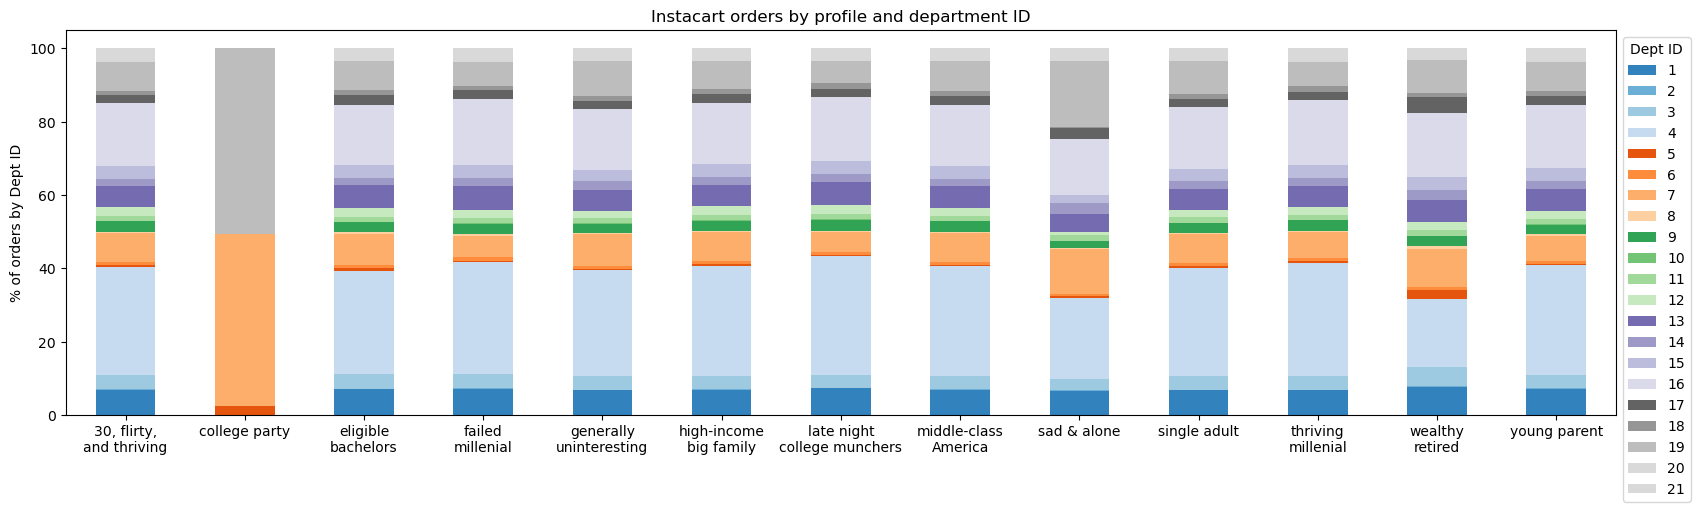

In [53]:
# Creating stacked bar graph to plot profile purchases per department id

bar_profile_deptid = crosstab_profile2.loc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].apply(lambda x: x*100/sum(x), axis=1).plot.bar(stacked=True, rot=0, figsize=(20,5), colormap='tab20c').legend(title="Dept ID", bbox_to_anchor=(1.0,1.0))
plt.xlabel("")
plt.ylabel("% of orders by Dept ID")
plt.title ("Instacart orders by profile and department ID")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['30, flirty,\nand thriving','college party','eligible\nbachelors','failed\nmillenial','generally\nuninteresting','high-income\nbig family','late night\ncollege munchers','middle-class\nAmerica','sad & alone','single adult', 'thriving\nmillenial','wealthy\nretired', 'young parent'])

In [54]:
# exporting bar chart

bar_profile_deptid.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'profile_orders_dept_id.png'), bbox_inches='tight')

#### 8b. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [68]:
# counting how many states per region (from crosstab in step 3b above)

crosstab_new['region'].value_counts(dropna = False)

South        17
West         13
Midwest      12
Northeast     9
Name: region, dtype: int64

Text(0, 0.5, '')

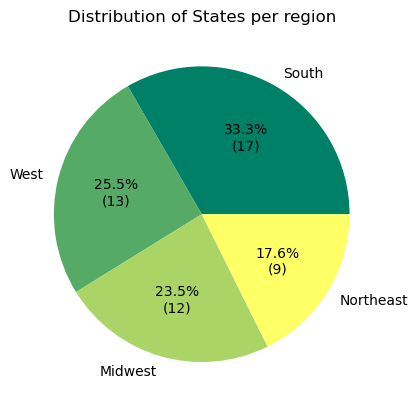

In [77]:
# creating pie chart of states per region to compare to several of the profiles to see if there's
# any difference or if it's all just evenly distributed

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = crosstab_new['region'].value_counts()
region_pie = crosstab_new['region'].value_counts().plot(kind='pie', autopct=make_autopct(values), colormap='summer')
plt.title ("Distribution of States per region")
plt.xlabel("")
plt.ylabel("")

In [78]:
# exporting bar chart

region_pie.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'region_pie.png'), bbox_inches='tight')

<AxesSubplot:ylabel='region'>

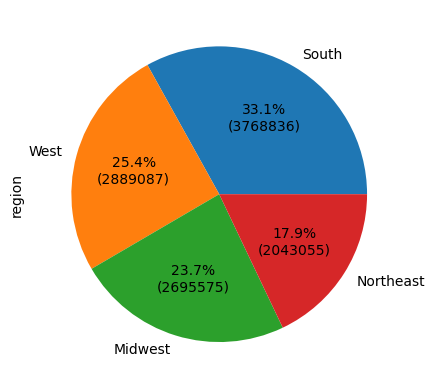

In [70]:
# creating pie chart for 'generally uninteresting' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'generally uninteresting'].value_counts()
df2['region'].loc[df2['profile'] == 'generally uninteresting'].value_counts().plot(kind='pie', autopct= make_autopct(values))

In [72]:
# as you can see, 'generally uninteresting' has practically the same regional distribution

<AxesSubplot:ylabel='region'>

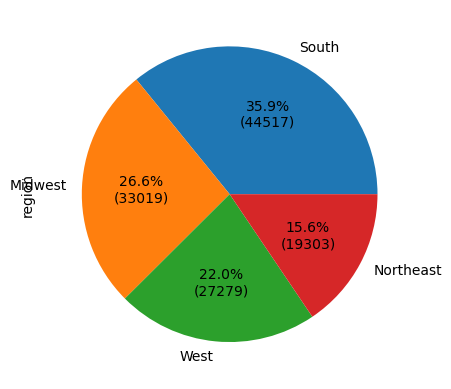

In [73]:
# creating pie chart for 'eligible bachelors' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'eligible bachelors'].value_counts()
df2['region'].loc[df2['profile'] == 'eligible bachelors'].value_counts().plot(kind='pie', autopct= make_autopct(values))

In [74]:
# though there are minor differences here, they're likely insignificant and coincidental

<AxesSubplot:ylabel='region'>

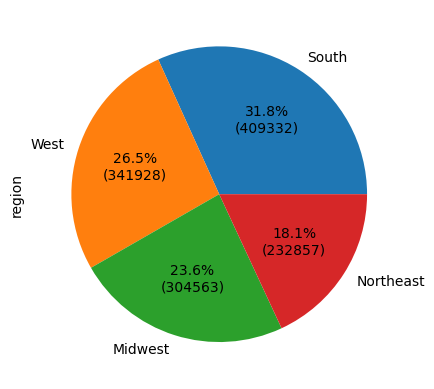

In [75]:
# creating pie chart for 'high-income big family' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'high-income big family'].value_counts()
df2['region'].loc[df2['profile'] == 'high-income big family'].value_counts().plot(kind='pie', autopct= make_autopct(values))

In [76]:
# this has possibly the biggest difference

<AxesSubplot:ylabel='region'>

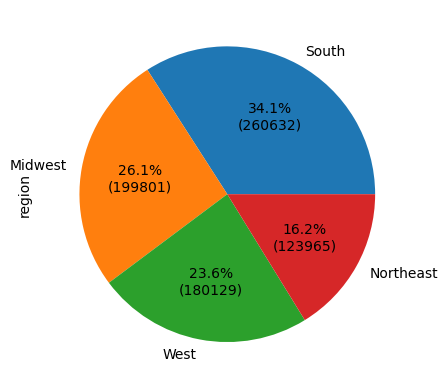

In [77]:
# creating pie chart for 'thriving millenial' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'thriving millenial'].value_counts()
df2['region'].loc[df2['profile'] == 'thriving millenial'].value_counts().plot(kind='pie', autopct= make_autopct(values))

In [78]:
# overall variation from the baseline (distribution of states per region) is still minimal

<AxesSubplot:ylabel='region'>

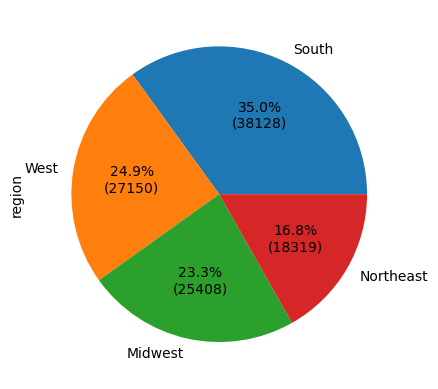

In [79]:
# creating pie chart for 'sad & alone' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'sad & alone'].value_counts()
df2['region'].loc[df2['profile'] == 'sad & alone'].value_counts().plot(kind='pie', autopct= make_autopct(values))

<AxesSubplot:ylabel='region'>

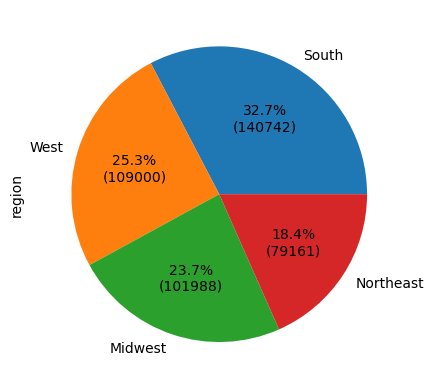

In [80]:
# creating pie chart for 'failed millenial' per region

# defining my own autopct call-out so I can include both percentage and actual values for comparing
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df2['region'].loc[df2['profile'] == 'failed millenial'].value_counts()
df2['region'].loc[df2['profile'] == 'failed millenial'].value_counts().plot(kind='pie', autopct= make_autopct(values))

In [81]:
# overall, without having geographically plotted every profile, I still think we can say that
# the distributions of profiles by region is based more on the general distribution of states
# per region (i.e. greater/lesser numbers for whole population per region) rather than
# it having any true insights on a per profile basis

In [4]:
# preparing data for price calculations (because too many outlier values)
# making prices above $100 become missing values (NaN)

df2.loc[df2['prices'] >100, 'prices'] = np.nan

In [27]:
# comparing ordering habits by region

df2.groupby('region').agg({'prices': ['mean', 'min', 'max'], 'avg_days_since_last_order': ['mean', 'min', 'max']})

prices            avg_days_since_last_order                
               mean  min   max                      mean       min   max
region                                                                  
Midwest    7.792318  1.0  25.0                 11.079077  0.000000  30.0
Northeast  7.781441  1.0  25.0                 10.962381  0.304428  30.0
South      7.794439  1.0  25.0                 11.002514  0.000000  30.0
West       7.790308  1.0  25.0                 10.941260  0.000000  30.0

In [28]:
# comparing ordering habits by loyalty status

df2.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max'], 'avg_days_since_last_order': ['mean', 'min', 'max']})

prices            avg_days_since_last_order            \
                      mean  min   max                      mean       min   
loyalty_flag                                                                
Loyal customer    7.773575  1.0  25.0                  6.034176  0.288591   
Newer customer    7.801665  1.0  25.0                 17.634730  0.000000   
Regular customer  7.798262  1.0  25.0                 12.204697  0.518987   

                             
                        max  
loyalty_flag                 
Loyal customer    12.678112  
Newer customer    30.000000  
Regular customer  29.586207

In [10]:
# comparing ordering habits by age and family status

df_age_fam = df2.groupby(['age','fam_status']).agg({'prices': ['mean', 'min', 'max'], 'avg_days_since_last_order': ['mean', 'min', 'max']}).applymap(lambda x: f"{x:0.3f}")

In [12]:
# trying to find a digestible way to show full content of my grouping and aggregated functions

with pd.option_context('display.max_rows', None,):
   print(df_age_fam)

                                     prices                 \
                                       mean    min     max   
age fam_status                                               
18  living with parents and siblings  7.826  1.000  25.000   
    single                            7.743  1.000  25.000   
19  living with parents and siblings  7.820  1.000  25.000   
    single                            7.761  1.000  25.000   
20  living with parents and siblings  7.775  1.000  25.000   
    single                            7.760  1.000  25.000   
21  living with parents and siblings  7.780  1.000  25.000   
    single                            7.780  1.000  25.000   
22  married                           7.784  1.000  25.000   
    single                            7.787  1.000  25.000   
23  married                           7.783  1.000  25.000   
    single                            7.791  1.000  25.000   
24  married                           7.801  1.000  25.000   
    sing

In [13]:
# trying to find a digestible way to show full content of my grouping and aggregated functions

print(df_age_fam.to_markdown())

|                                          |   ('prices', 'mean') |   ('prices', 'min') |   ('prices', 'max') |   ('avg_days_since_last_order', 'mean') |   ('avg_days_since_last_order', 'min') |   ('avg_days_since_last_order', 'max') |
|:-----------------------------------------|---------------------:|--------------------:|--------------------:|----------------------------------------:|---------------------------------------:|---------------------------------------:|
| (18, 'living with parents and siblings') |                7.826 |                   1 |                  25 |                                  11.114 |                                  1.034 |                                     30 |
| (18, 'single')                           |                7.743 |                   1 |                  25 |                                  11.283 |                                  1.332 |                                     30 |
| (19, 'living with parents and siblings') |            

In [14]:
# exporting the grouping and aggregated data of age & family status ordering habits

df_age_fam.to_csv(os.path.join(project, '02 Data','Prepared Data', 'age_famstatus_orderhabits.csv'))

#### 9. Comparing "profile" activity within department ids

Text(0.5, 1.0, 'Instacart orders by department id')

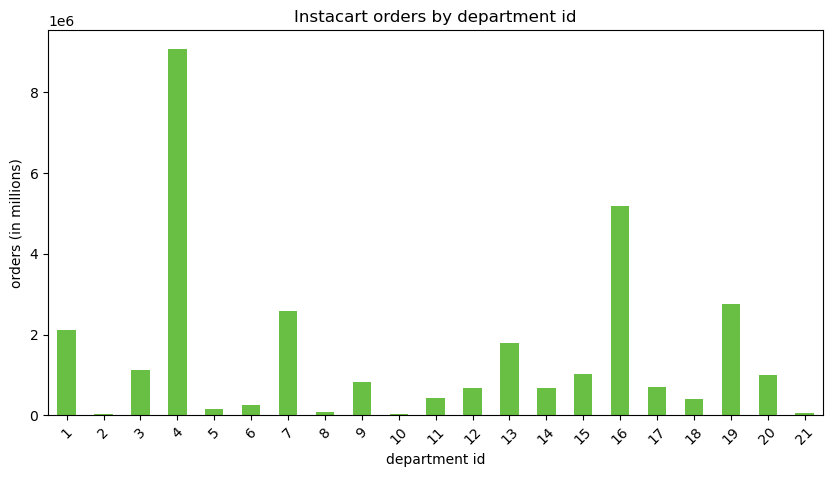

In [5]:
# creating bar chart of purchases by department_id to set a baseline

bar = df2['department_id'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Instacart orders by department id")

In [6]:
# exporting bar chart

bar.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_orders_dept.png'), bbox_inches='tight')

In [ ]:
# creating bar chart of purchases by department_id per profile

bar = df2[['department_id', 'profile']].plot(kind="bar", stacked = True, x='profile', y='department_id', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Instacart orders by department id")

In [ ]:
# creating bar chart of purchases by department_id per profile

bar = df2[['department_id', 'profile']].value_counts().plot(kind="bar", stacked = True, x='profile', y='department_id', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Instacart orders by department id")

Text(0.5, 1.0, 'Midwest Instacart orders by department id')

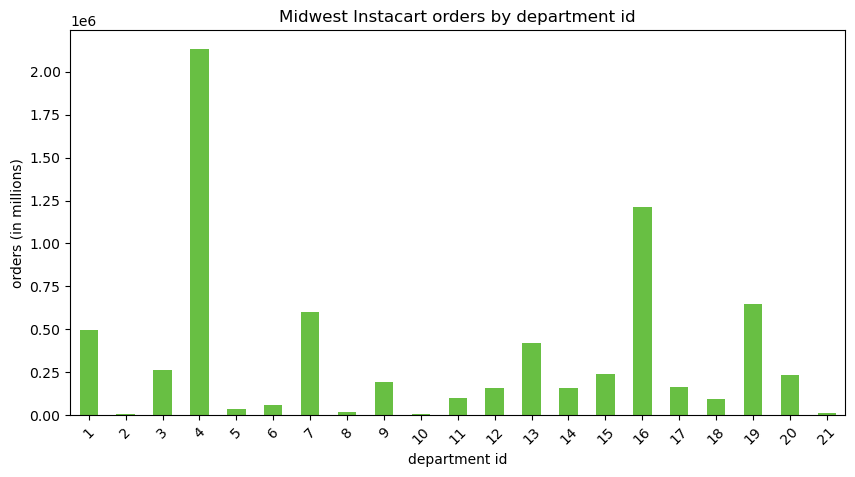

In [29]:
# creating bar chart of Midwest customer purchases by department_id

bar5 = df2['department_id'].loc[df2['region'] == 'Midwest'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Midwest Instacart orders by department id")

In [30]:
# exporting bar chart

bar5.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'midwest_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Northeast Instacart orders by department id')

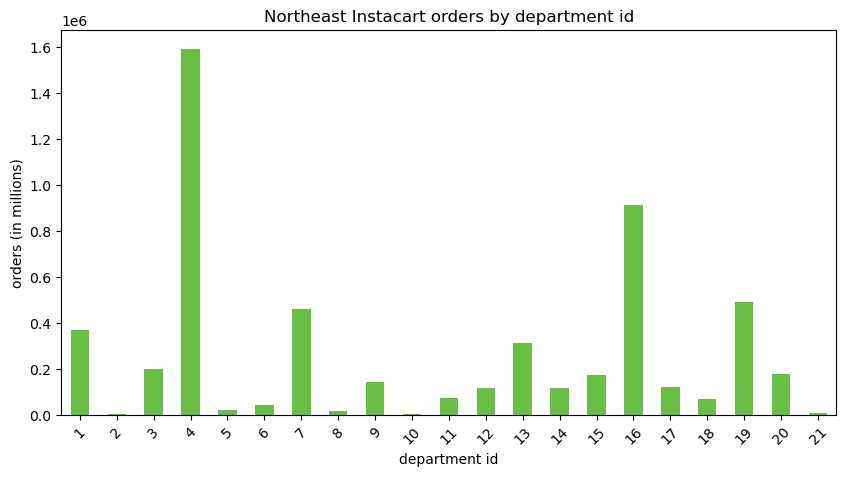

In [31]:
# creating bar chart of Northeast customer purchases by department_id

bar6 = df2['department_id'].loc[df2['region'] == 'Northeast'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Northeast Instacart orders by department id")

In [32]:
# exporting bar chart

bar6.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'northeast_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'South Instacart orders by department id')

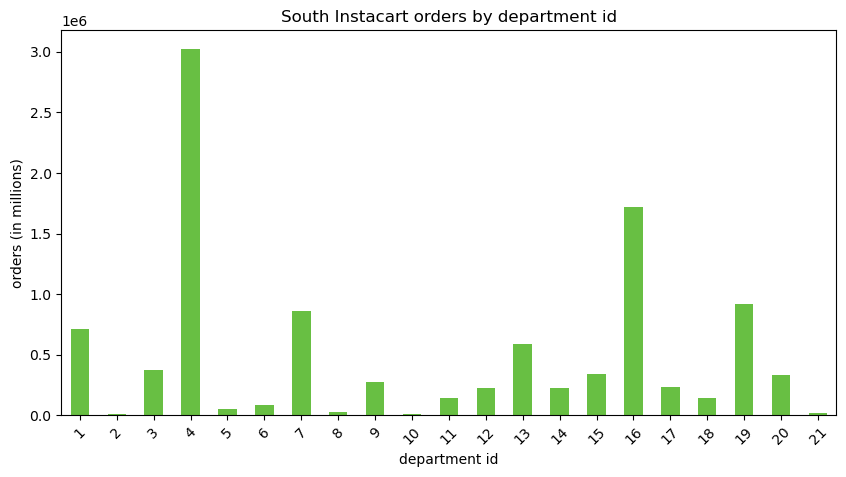

In [33]:
# creating bar chart of South customer purchases by department_id

bar7 = df2['department_id'].loc[df2['region'] == 'South'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("South Instacart orders by department id")

In [34]:
# exporting bar chart

bar7.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'south_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'West Instacart orders by department id')

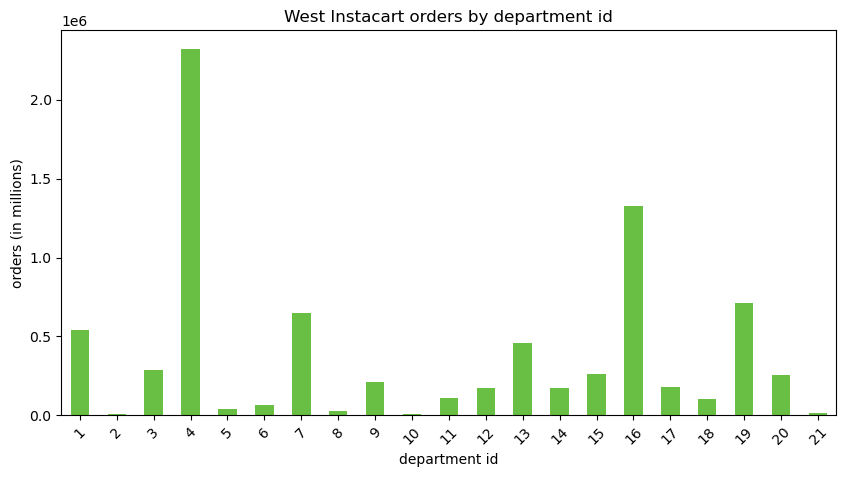

In [35]:
# creating bar chart of West customer purchases by department_id

bar8 = df2['department_id'].loc[df2['region'] == 'West'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("West Instacart orders by department id")

In [36]:
# exporting bar chart

bar8.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'west_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Newer customer Instacart orders by department id')

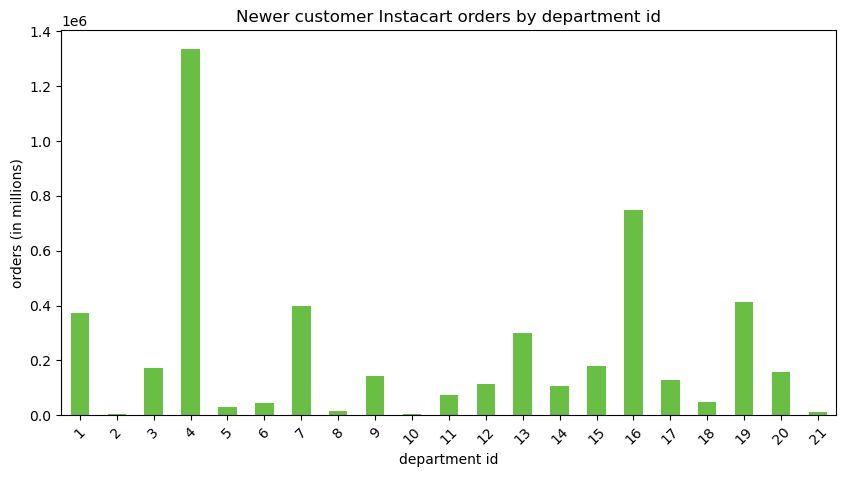

In [7]:
# creating bar chart of newer customer purchases by department_id

bar2 = df2['department_id'].loc[df2['loyalty_flag'] == 'Newer customer'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Newer customer Instacart orders by department id")

In [8]:
# exporting bar chart

bar2.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_newcust_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Regular customer Instacart orders by department id')

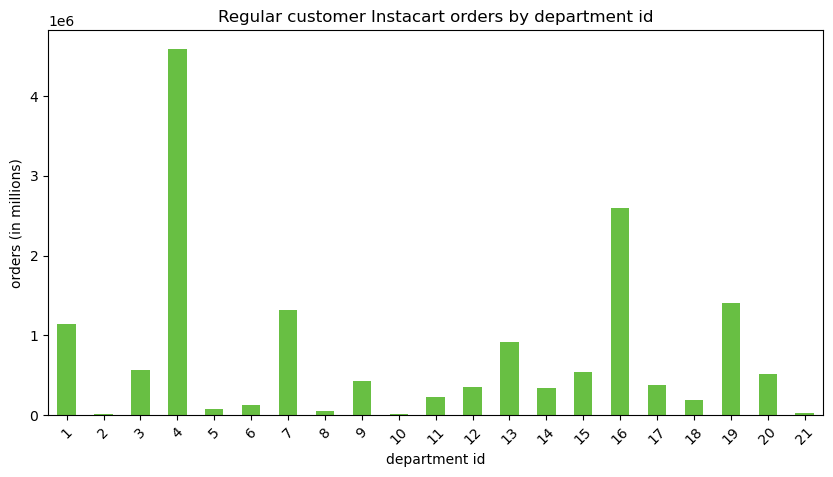

In [9]:
# creating bar chart of newer customer purchases by department_id

bar3 = df2['department_id'].loc[df2['loyalty_flag'] == 'Regular customer'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Regular customer Instacart orders by department id")

In [11]:
# exporting bar chart

bar3.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_regcust_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Loyal customer Instacart orders by department id')

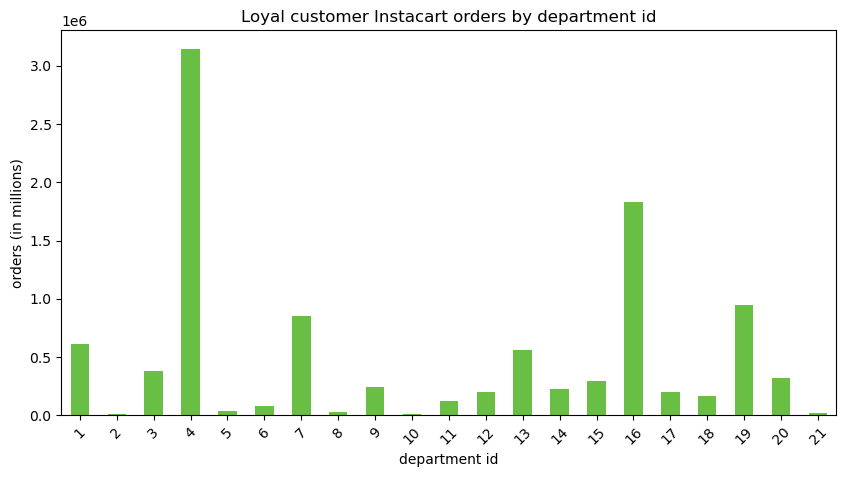

In [12]:
# creating bar chart of Loyal customer purchases by department_id

bar4 = df2['department_id'].loc[df2['loyalty_flag'] == 'Loyal customer'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders (in millions)")
plt.title ("Loyal customer Instacart orders by department id")

In [13]:
# exporting bar chart

bar4.figure.savefig(os.path.join(project, '04 Analysis', 'Visualizations', 'bar_loyalcust_orders_dept.png'), bbox_inches='tight')

Text(0.5, 1.0, "'failed millenial' Instacart orders by department id")

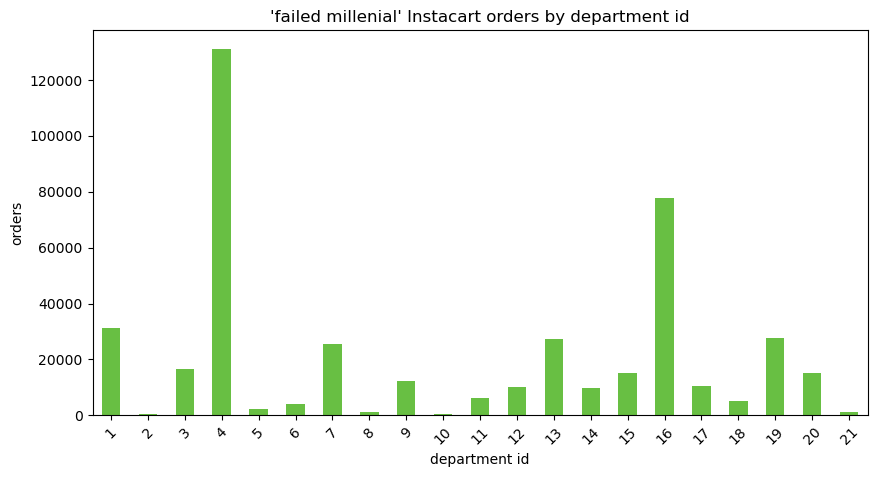

In [93]:
# creating bar chart of 'failed millenial' purchases by department_id

bar = df2['department_id'].loc[df2['profile'] == 'failed millenial'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders")
plt.title ("'failed millenial' Instacart orders by department id")

Text(0.5, 1.0, "'thriving millenial' Instacart orders by department id")

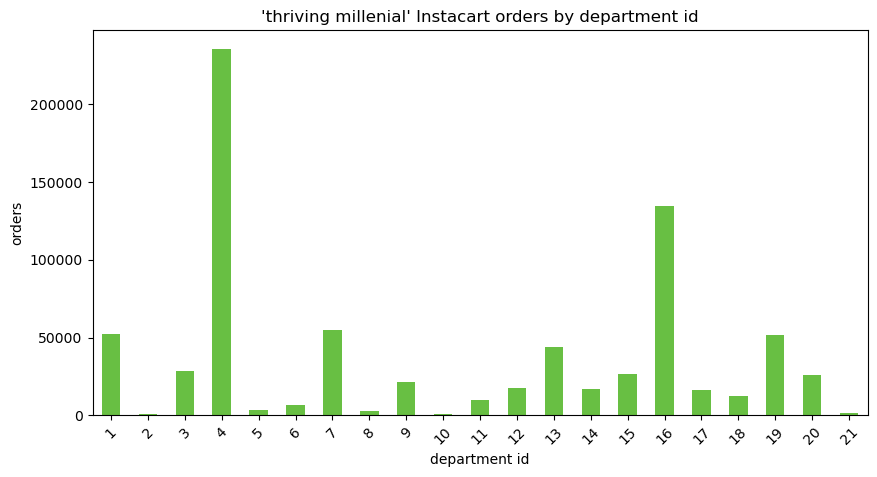

In [96]:
# creating bar chart of 'thriving millenial' purchases by department_id

bar = df2['department_id'].loc[df2['profile'] == 'thriving millenial'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders")
plt.title ("'thriving millenial' Instacart orders by department id")

Text(0.5, 1.0, "'young parent' Instacart orders by department id")

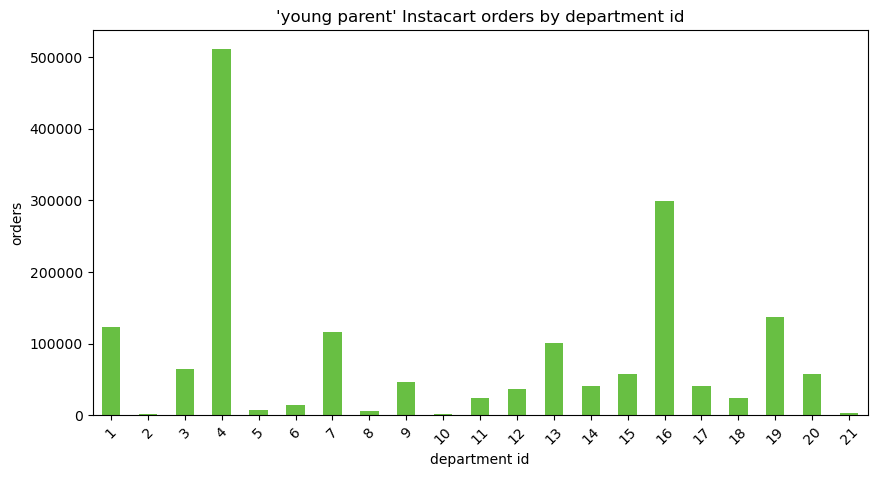

In [98]:
# creating bar chart of 'young parent' purchases by department_id

bar = df2['department_id'].loc[df2['profile'] == 'young parent'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders")
plt.title ("'young parent' Instacart orders by department id")

Text(0.5, 1.0, "'high-income big family' Instacart orders by department id")

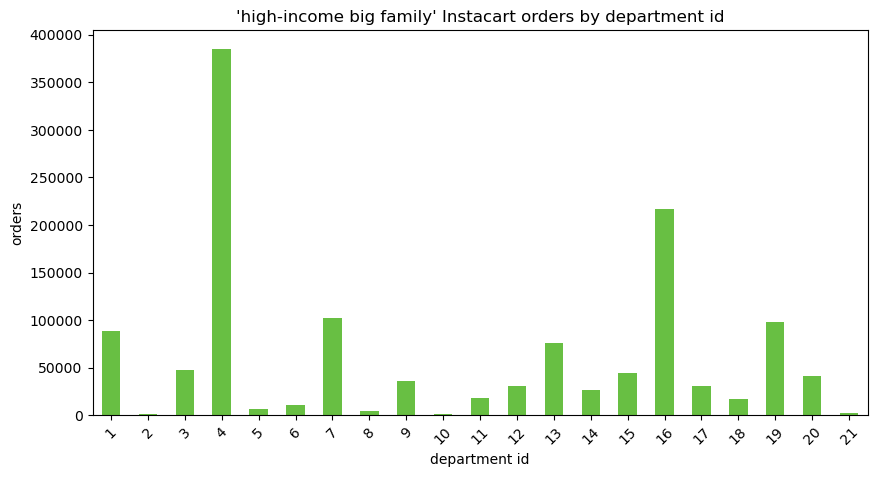

In [99]:
# creating bar chart of 'high-income big family' purchases by department_id

bar = df2['department_id'].loc[df2['profile'] == 'high-income big family'].value_counts().sort_index().plot.bar(color = '#68bf43', rot=45, figsize = (10,5))
plt.xlabel("department id")
plt.ylabel("orders")
plt.title ("'high-income big family' Instacart orders by department id")

In [100]:
# as you can see, the distribution of orders by department id doesn't vary at all by profile
# both thriving and failed millenials have the same dept_id order distribution
# and so does both young parents and high-income big families.
# I.e. ALL of the demographic data is worthless for trying to gain insights
# because of the fact that it's all fabricated and too evenly distributed